# DTSA-5510 Unsupervised Algorithms in Machine Learning - Final Project

In this project, I'm doing an analysis of bird songs based on the [bird song data set](https://www.kaggle.com/datasets/vinayshanbhag/bird-song-data-set) available on Kaggle. This data set consists of 9110 .wav audio files of bird song recordings from 5 different bird species. I will be using spectral audio processing libraries along with dimensionality reduction and clustering algorithms to build an unsupervised model for categorizing the bird songs by species.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

We'll begin by importing and inspecting the metadata from the data set.

In [3]:
metadata_df = pd.read_csv('./data/bird_songs_metadata.csv')
metadata_df

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-8.wav
5418,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-10.wav
5419,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-14.wav
5420,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-15.wav


Doing a count of the different species, we see the 5 species are fairly well-balanced in this data set.

In [8]:
metadata_df['species'].value_counts()

species
melodia        1256
polyglottos    1182
cardinalis     1074
migratorius    1017
bewickii        893
Name: count, dtype: int64

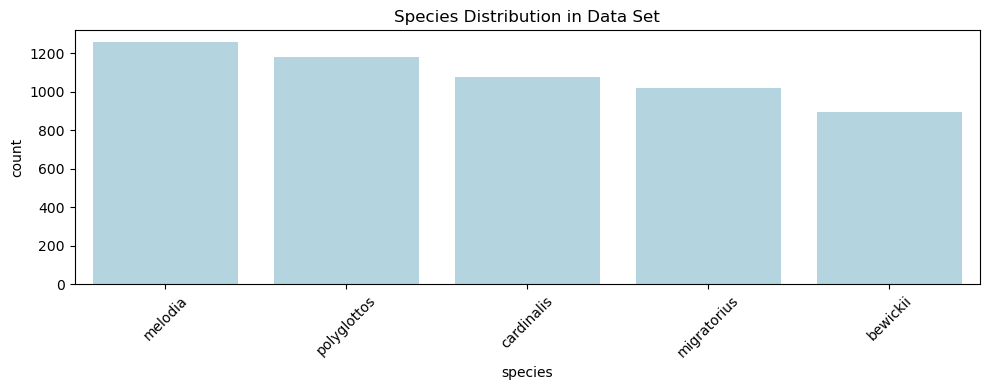

In [14]:
plt.figure(figsize=(10, 4))
sns.countplot(data=metadata_df, x="species", order=metadata_df['species'].value_counts().index, color='lightblue')
plt.title("Species Distribution in Data Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
metadata_df['location'].value_counts()

location
San Bernardino National Wildlife Refuge, Cochise County, Arizona    252
Hendrix Habitat - Fairview, Williamson County, Tennessee            195
San Simon Cienega, Cochise County, Arizona                           94
Sewanee, Franklin County, Tennessee                                  85
Knoxville, Tennessee                                                 74
                                                                   ... 
Big Cottonwood Park, Salt Lake County, Utah                           5
San Diego, San Diego County, California                               5
Sawhill Ponds, Boulder County, Colorado                               4
Gates Canyon, Solano County, California                               4
4th and Forest, Boulder, Boulder County, Colorado                     2
Name: count, Length: 304, dtype: int64

/var/folders/3z/xtbc__5n12d68188cbh4f1s80000gn/T/ipykernel_99293/114373982.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


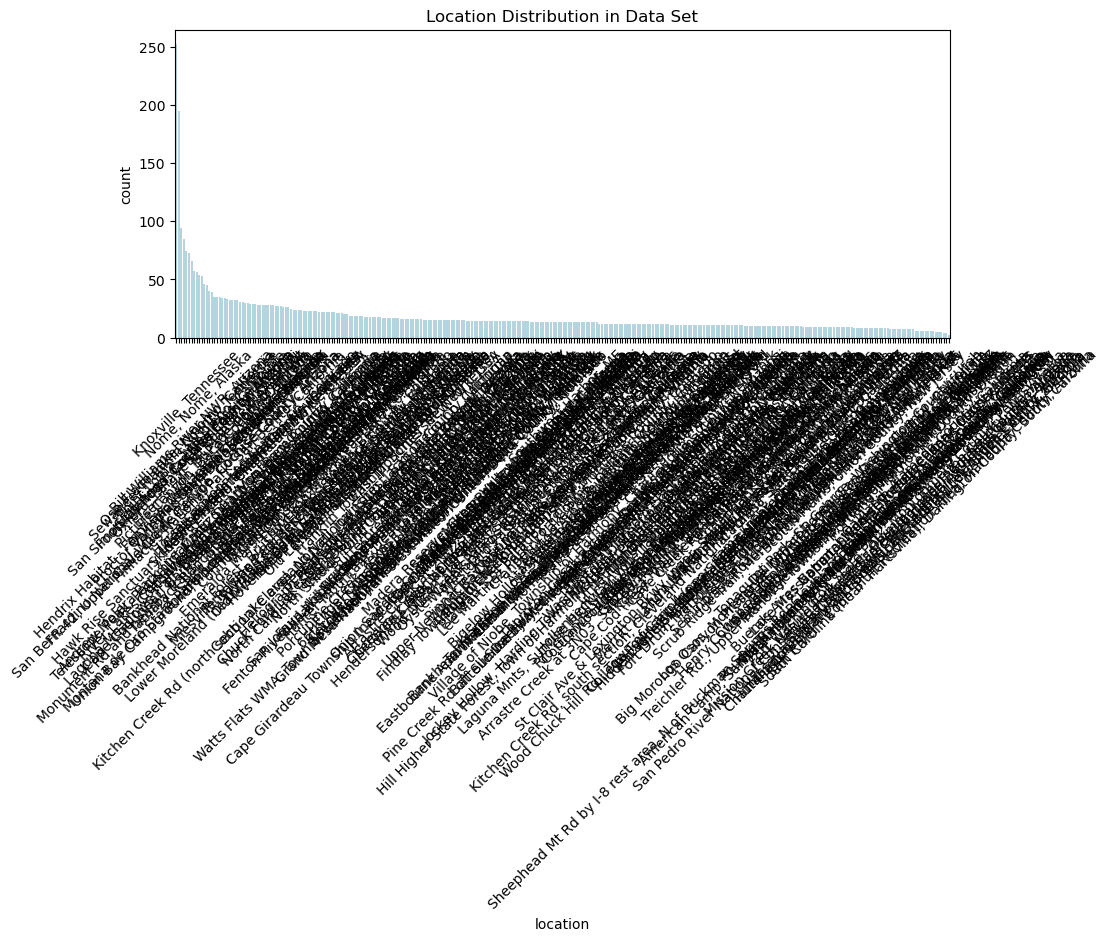

In [16]:
plt.figure(figsize=(10, 4))
sns.countplot(data=metadata_df, x="location", order=metadata_df['location'].value_counts().index, color='lightblue')
plt.title("Location Distribution in Data Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()